# Principal Component Analysis

Most popular dimensionality reduction algorithm - works by identifying a hyperplane that lies close to the data and then projects said data onto it. For this you want to keep the maximum amount of variance as this will allow for minimal loss of information than the other projections.

## Curse of Dimensionality

Essentially, when data has too many features (dimensions), with each increasing dimension the space grows so quickly that data points become sparse, and thus distances between points start to lose meaning. Models become prone to overfitting on the many features since they pick up more on noise (unnecessary features) rather than the principal components.

## Singular Value Decomposition (SVD)

This can decompose the training set matrix **$X$** into the matrix multiplication of three matrices **$U\sum V^T$** where V contains the unit vectors that define all the principal components that you're looking for:
$$
V =
\begin{pmatrix}
| & | & & | \\
c_1 & c_2 & ... & c_n \\
| & | & & |
\end{pmatrix}
$$

In [1]:
import numpy as np

X = np.random.rand(100, 3)
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

## **Warning**

PCA assumes that the dataset is centered about the origin, Scikit-Learn takes care of this, however when implementing by yourself don't forget to clean the data.

## Projecting Down to d Dimensions

$X_{d-proj} = XW_d$ where $X$ is the training set matrix

In [2]:
W2 = Vt[:2].T
X2D = X_centered @ W2 # Dot product

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D2 = pca.fit_transform(X)

### Explained Variance Ratio

Indicates the proportion of the dataset's variance that lies along each principal componet

In [4]:
# Shows 41% variance along first PC and 33% along the second. This leaves 26% for the final PC.
pca.explained_variance_ratio_

array([0.37552262, 0.3358711 ])

In [5]:
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [7]:
# This is the manual way to complete this. Instead do the next cell

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [9]:
pca.n_components_

np.int64(154)

### PCA used for Random Forest Classification

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))
param_distrib = {
    'pca__n_components': np.arange(10, 80), 'randomforestclassifier__n_estimators': np.arange(50, 500)
}

random_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=10, random_state=42)
random_search.fit(X_train[:1000], y_train[:1000])

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'pca__n_components': array([10, 11... 78, 79]), 'randomforestclassifier__n_estimators': array([ 50, ...97, 498, 499])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [11]:
print(random_search.best_params_)

{'randomforestclassifier__n_estimators': np.int64(490), 'pca__n_components': np.int64(21)}


### Compression

After applying PCA to MNIST dataset while preserving 95% of the variance, we're left with 154 features (originally was 784). Dataset is now 20% of its original size and we only lost 5% of the variance.

In [12]:
X_recovered = pca.inverse_transform(X_reduced)

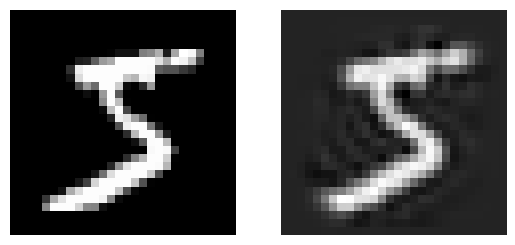

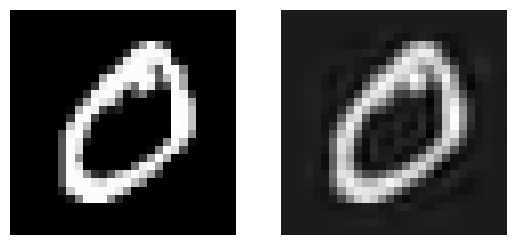

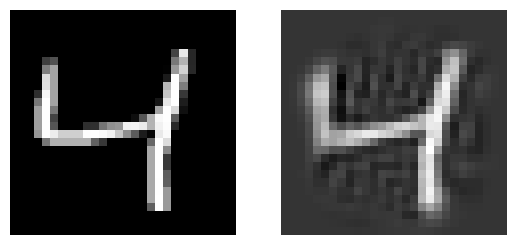

In [13]:
import matplotlib.pyplot as plt

for i in range(0,3):
    plt.subplot(1,2,1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(X_recovered[i].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.show()


### Randomised PCA

Scikit-Learn will now use a stochastic algorithm that quickly finds an approximation of the first $d$ principal components.

Computational complexity of $O(m*d^2) + O(d^3)$ rather than $O(m*n^2) + O(n^3)$

In [14]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit(X_train)